#<font color='navy' size=8px> Convex Hulls and Triangulations

A set $A$ in $\mathbb{R}^n$ is called convex if for any two points in $A$, the line segment connectingn them is entirely included in $A.$

Let $\vec{x_1}$, $\vec{x_2}$, ... $\vec{x_k}$ points in $\mathbb{R}^n.$

The convex hull of $\left\{\vec{x_1},\vec{x_2},...\vec{x_k}\right\}$

$$\text{Conv}\left(\left\{\vec{x_1},\vec{x_2},...\vec{x_k}\right\}\right)=\left\{\sum_{1}^{k} \lambda_i\vec{x_i}: \lambda_i\geq 0, \,\, \sum_{i=1}^{k} \lambda_i=1\right\}$$

In a Delaunay triangulation, triangles are chosen such that no point is inside the circumcircle of any triangle.

Reference: https://learnopencv.com/delaunay-triangulation-and-voronoi-diagram-using-opencv-c-python/





In [1]:
# graphical libraries
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
from IPython.display import Image
from IPython.display import display
plt.style.use('seaborn-white')

/tmp/ipykernel_238284/992099449.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import mpl_toolkits.mplot3d as a3
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy as sp
import scipy.spatial
from scipy.spatial import Delaunay

In [3]:
def get_simplices(self, vertex):
    "Find all simplices this `vertex` belongs to"
    visited = set()
    queue = [self.vertex_to_simplex[vertex]]
    while queue:
        simplex = queue.pop()
        for i, s in enumerate(self.neighbors[simplex]):
            if self.simplices[simplex][i] != vertex and s != -1 and s not in visited:
                queue.append(s)
        visited.add(simplex)
    return np.array(list(visited))


In [5]:
np.random.seed(1234)
points = np.random.rand(12, 2)
points = points[np.argsort(points[:,0])]
tri = scipy.spatial.Delaunay(points)
vertex = 8
simplices = get_simplices(tri, vertex)
# 0, 2, 5, 9, 11
neighbors = np.unique(tri.simplices[simplices].reshape(-1))

In [6]:
T1 = points[tri.simplices][0].reshape(3,2)

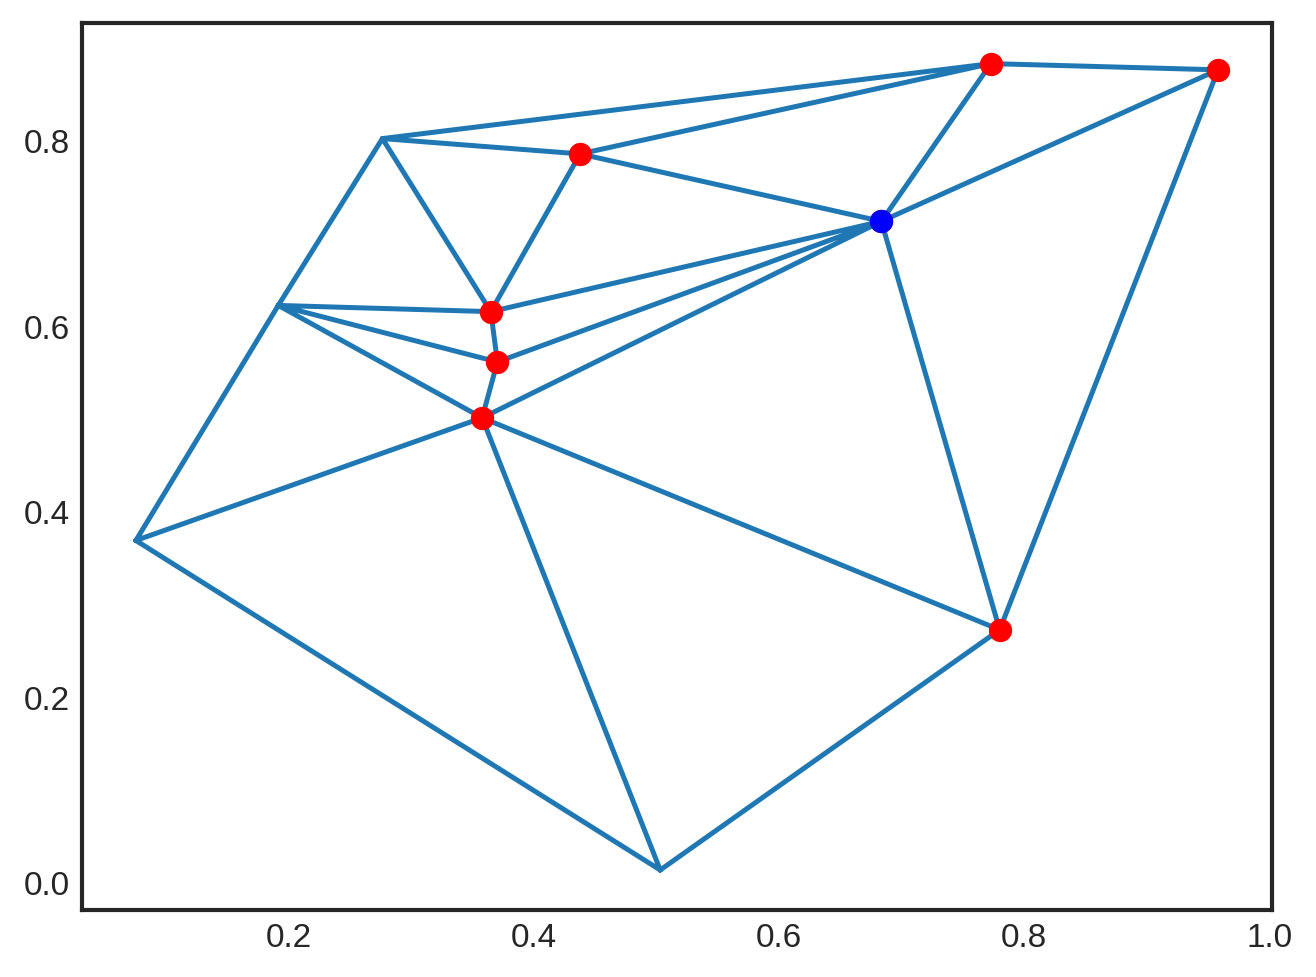

In [7]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[neighbors,0], points[neighbors,1], 'or')
plt.plot(points[vertex,0], points[vertex,1], 'ob')
plt.show()

## Circumscribed Circle Calculation (2-D)

In [6]:
def circle_circumscribed(T): # here T stands for a triangle (i.e. specify the coordinates of three points)
    (x1, y1), (x2, y2), (x3, y3) = T
    A = np.array([[x3-x1,y3-y1],[x3-x2,y3-y2]])
    Y = np.array([(x3**2 + y3**2 - x1**2 - y1**2),(x3**2+y3**2 - x2**2-y2**2)])
    if np.linalg.det(A) == 0:
        return False
    Ainv = np.linalg.inv(A)
    X = 0.5*np.dot(Ainv,Y)
    x,y = X[0],X[1]
    r = np.sqrt((x-x1)**2+(y-y1)**2)
    return (x,y),r

T = ((0, 0), (1, 0), (0, 1))
center, radius = circle_circumscribed(T1)

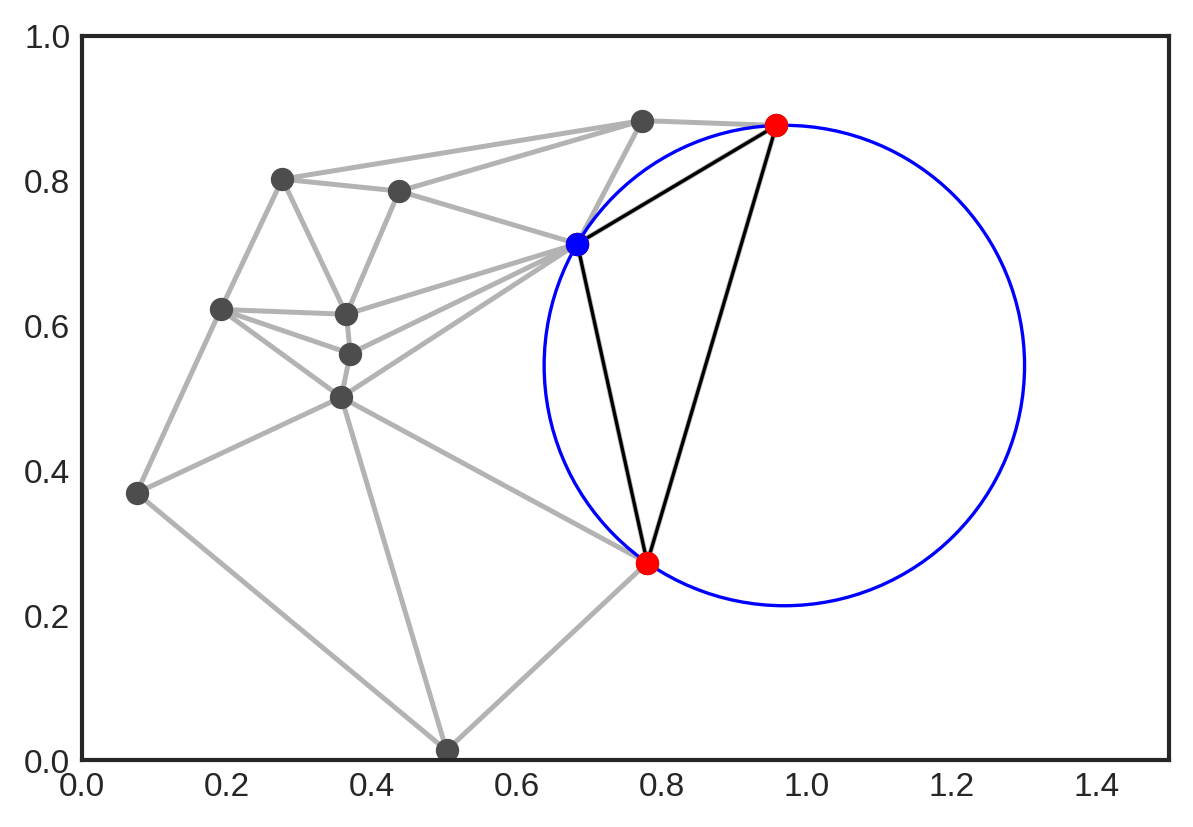

In [ ]:
figure, ax = plt.subplots()
ax.triplot(points[:, 0], points[:, 1], tri.simplices.copy(), color='0.7')
ax.plot(points[:, 0], points[:, 1], 'o', color='0.3')
ax.plot(T1[:,0],T1[:,1],'or')
ax.plot(points[vertex,0], points[vertex,1], 'ob')
circle = plt.Circle(center, radius,color='blue',fill=False)
triang = plt.Polygon(T1,fill=False)
ax.set_xlim(0,1.5)
ax.set_ylim(0,1)
ax.set_aspect( 1 )
ax.add_artist( circle )
ax.add_artist(triang)
plt.show()

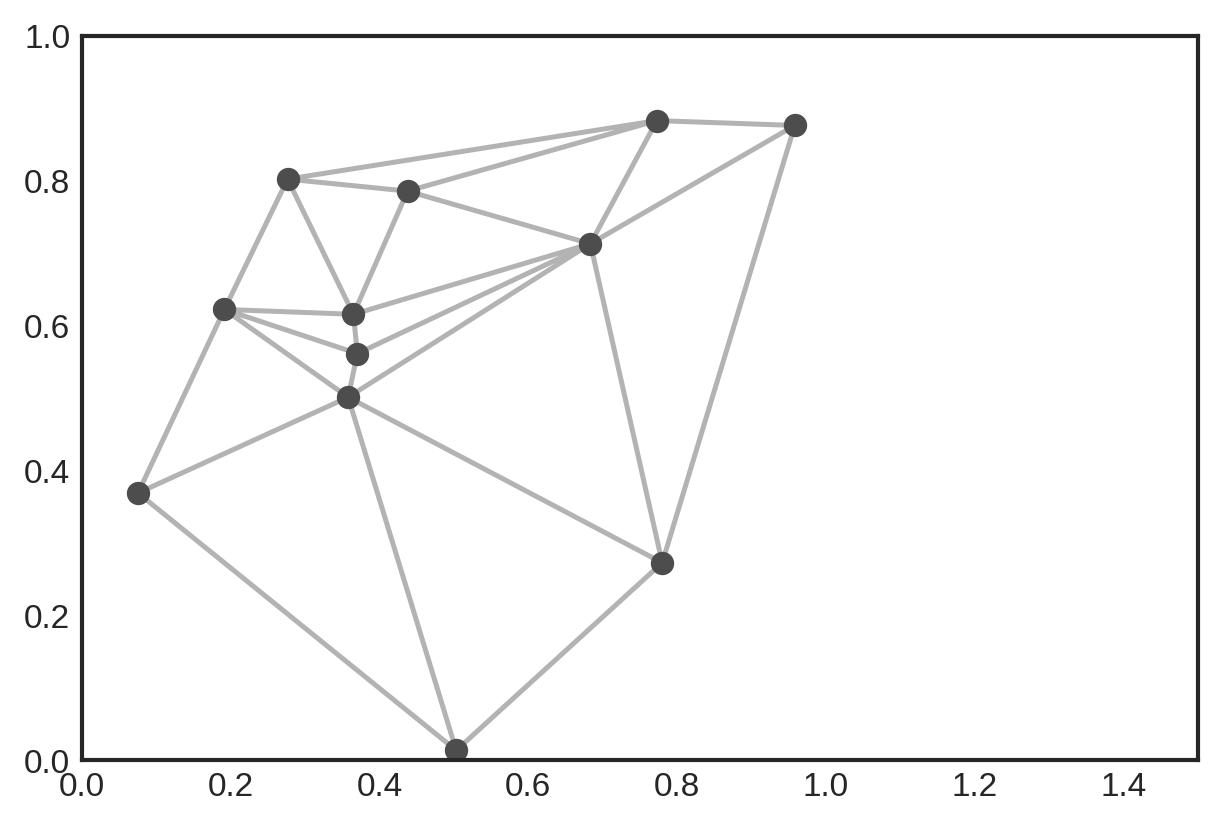

In [ ]:

#points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1],[1.5, 0.6],[1.2, 0.5],[1.7, 0.9],[1.1, 0.1],])

#tri = scipy.spatial.Delaunay(points)

plt.xlim(0,1.5)
plt.ylim(0,1)
plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy(), color='0.7')
plt.plot(points[:, 0], points[:, 1], 'o', color='0.3')
plt.show()

## Some Examples of Convex Polyhedra

area:  34.64101615137756
volume:  17.453559924999308


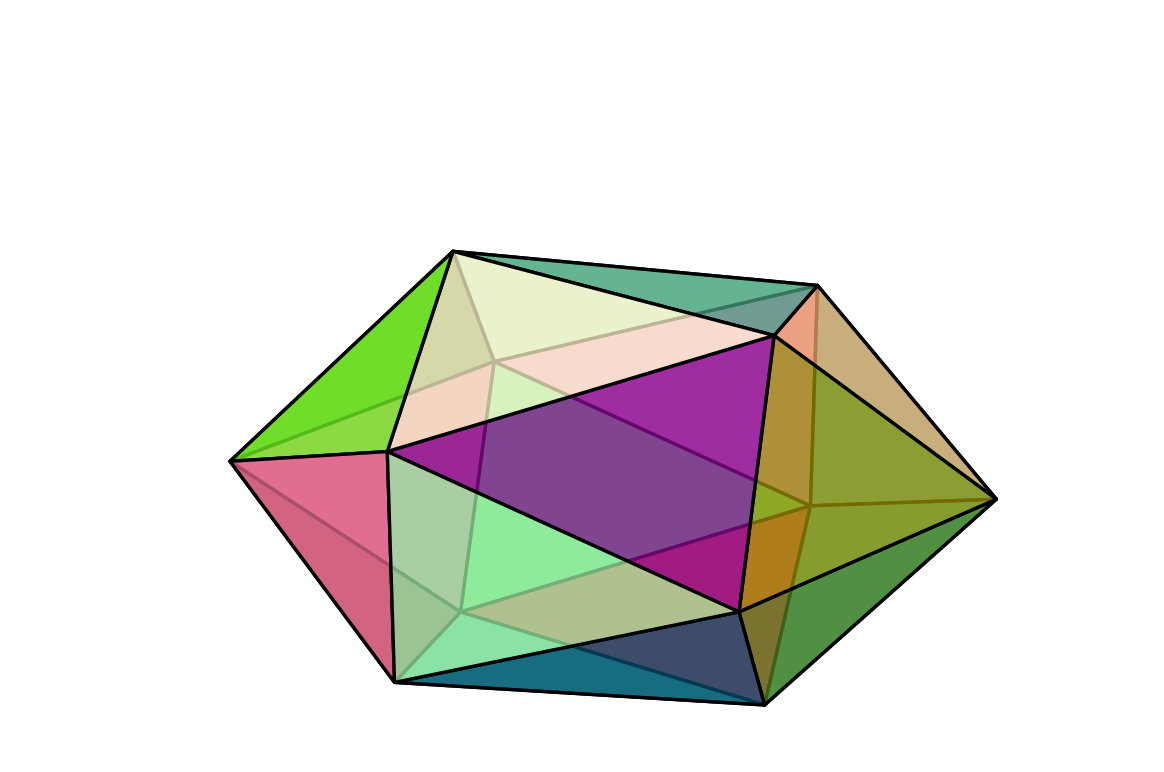

In [ ]:
def icosahedron():
    h = 0.5*(1+np.sqrt(5))
    p1 = np.array([[0, 1, h], [0, 1, -h], [0, -1, h], [0, -1, -h]])
    p2 = p1[:, [1, 2, 0]]
    p3 = p1[:, [2, 0, 1]]
    return np.vstack((p1, p2, p3))


def cube():
    points = np.array([
        [0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
        [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1],
    ])
    return points


points = icosahedron()
# points = cube()

hull = scipy.spatial.ConvexHull(points)
indices = hull.simplices
faces = points[indices]

print('area: ', hull.area)
print('volume: ', hull.volume)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.dist = 30
ax.azim = -140
ax.set_axis_off()


for f in faces:
    face = a3.art3d.Poly3DCollection([f])
    face.set_color(mpl.colors.rgb2hex(np.random.rand(3)))
    face.set_edgecolor('k')
    face.set_alpha(0.75)
    ax.add_collection3d(face)

plt.show()

# Application in 3-D

Reference: https://nseverkar.medium.com/triangulation-with-python-680227ff6a69

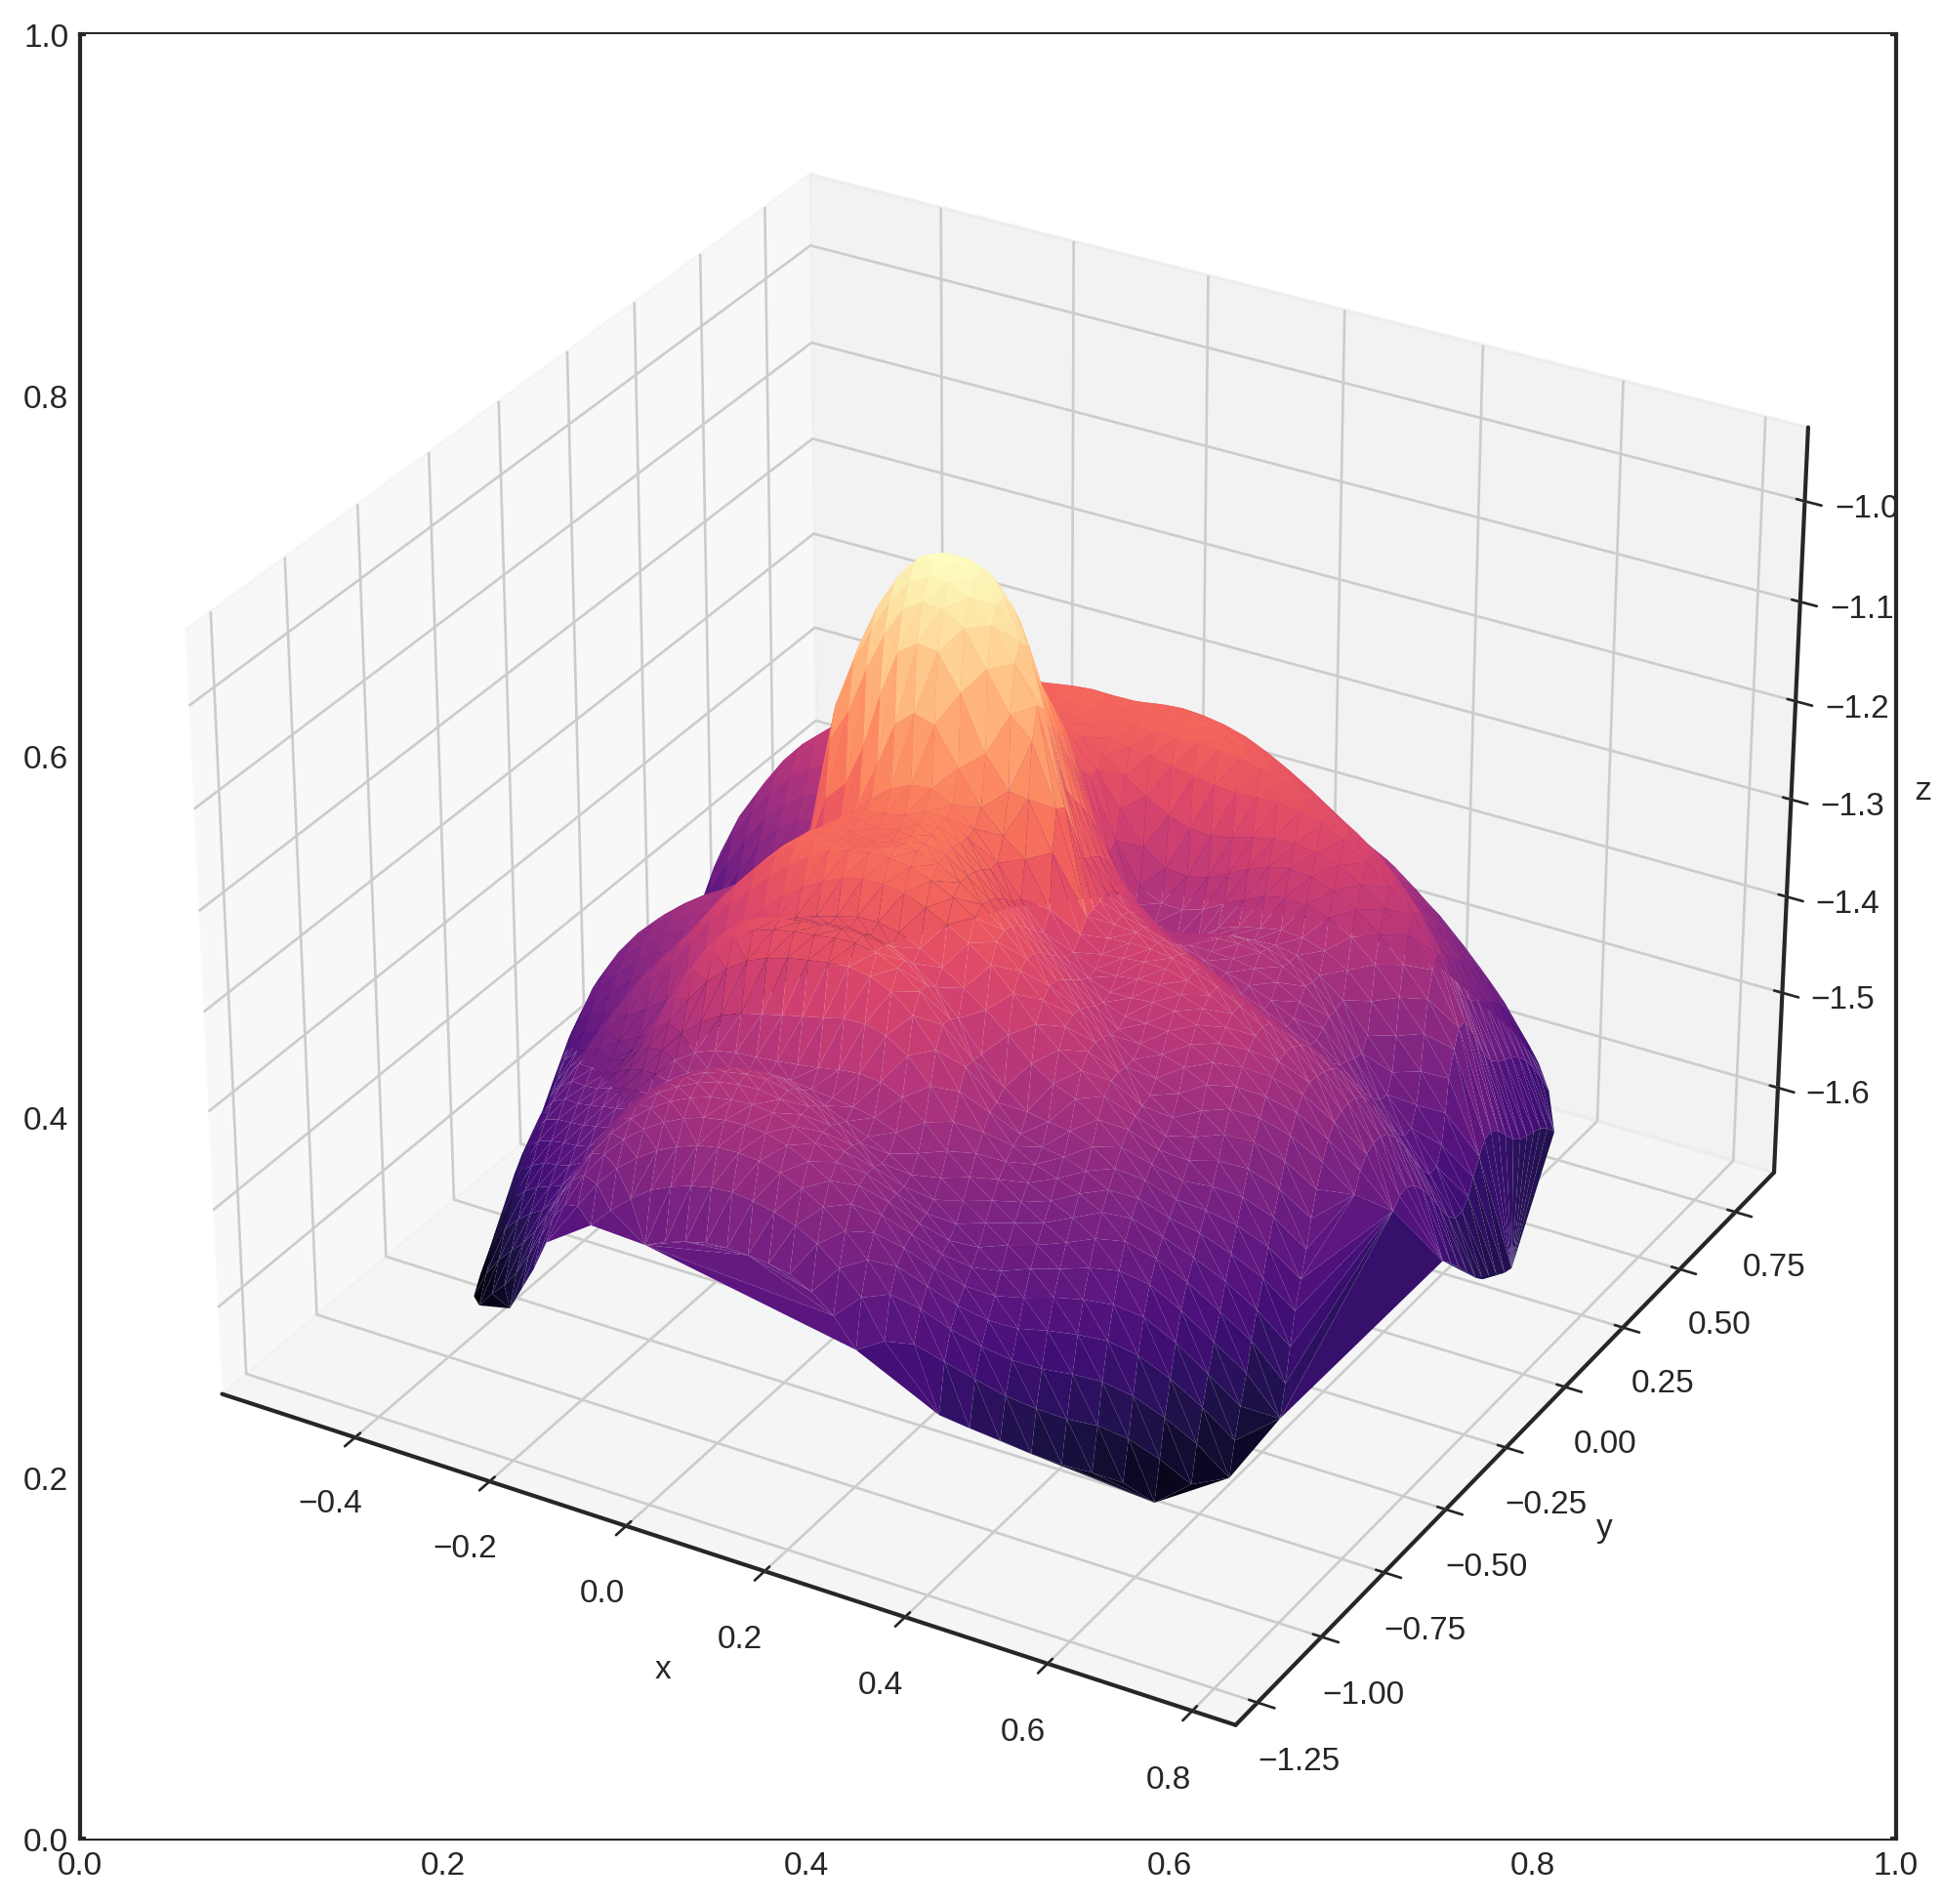

In [18]:
# take n x 3 array of points of the form (x, y, f(x,y))
def triangulateFunctionGraph(ax, XYZ, cmap=cm.magma):
    tri = Delaunay(XYZ[:,:2]) # triangulate projections
    ax.plot_trisurf(
        XYZ[:,0], XYZ[:,1], XYZ[:,2],
        triangles=tri.simplices, cmap=cmap
    )

def readFace(file):
    with open(file, 'r') as vertices:
        return np.array([
            [float(v) for v in line.split()]
            for line in vertices
        ])

fig = plt.figure(figsize=(10,10))
fig.add_subplot(111)
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
xyz = readFace('drive/MyDrive/Data Sets/face.data')
triangulateFunctionGraph(ax, xyz)
plt.show()

In [27]:
# take n x 3 array of points of the form (x, y, f(x,y))
def triangulateFunctionGraph(ax, XYZ, cmap=cm.magma):
    tri = Delaunay(XYZ[:,:2]) # triangulate projections

    fig = ff.create_trisurf(x=XYZ[:,0], y=XYZ[:,1], z=XYZ[:,2],
                         simplices=tri.simplices,
                         colormap ="Portland",
                         title="3-D Scan", aspectratio=dict(x=1, y=1, z=0.3))
    fig.show()


def readFace(file):
    with open(file, 'r') as vertices:
        return np.array([
            [float(v) for v in line.split()]
            for line in vertices
        ])

xyz = readFace('drive/MyDrive/Data Sets/face.data')
triangulateFunctionGraph(ax, xyz)
plt.show()

In [16]:
# for creating interactive 3-d plots use plotly
import plotly.figure_factory as ff

import numpy as np
from scipy.spatial import Delaunay

u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, 2*np.pi, 20)
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()

x = (3 + (np.cos(v)))*np.cos(u)
y = (3 + (np.cos(v)))*np.sin(u)
z = np.sin(v)

points2D = np.vstack([u,v]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x=x, y=y, z=z,
                         simplices=simplices,
                         title="Torus", aspectratio=dict(x=1, y=1, z=0.3))
fig.show()

In [17]:
u = np.linspace(0, 2*np.pi, 24)
v = np.linspace(-1, 1, 8)
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()

tp = 1 + 0.5*v*np.cos(u/2.)
x = tp*np.cos(u)
y = tp*np.sin(u)
z = 0.5*v*np.sin(u/2.)

points2D = np.vstack([u,v]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x=x, y=y, z=z,
                         colormap="Portland",
                         simplices=simplices,
                         title="Mobius Band")
fig.show()